In [1]:
%run additional.ipynb

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
pandas.set_option('display.max_colwidth', 120)

# HLT2 nbody classification

did preselections:

* any sv.n, 
* any sv.minpt
* sv.nlt16 < 2

## Training channels (read data)

We will use just 11114001, 11296013, 11874042, 12103035, 13246001, 13264021

In [4]:
sig_train_modes_names = [11114001, 11296013, 11874042, 12103035, 13246001, 13264021]
bck_train_mode_name = 30000000
sig_train_files = ['mod_{}.csv'.format(name) for name in sig_train_modes_names]
bck_train_files = 'mod_30000000.csv'
folder = "datasets/prepared_hlt_body/"

In [5]:
# concat all signal data
if not os.path.exists(folder + 'signal_hlt2.csv'):
    concat_files(folder, sig_train_files, os.path.join(folder , 'signal_hlt2.csv'))

In [6]:
signal_data = pandas.read_csv(os.path.join(folder , 'signal_hlt2.csv'), sep='\t')
bck_data = pandas.read_csv(os.path.join(folder , bck_train_files), sep='\t')

In [7]:
signal_data.columns

Index([u'unique', u'mode', u'event_number', u'sv_number', u'pass_2body', u'pass_nbody', u'signal', u'sumpt', u'm', u'mcor', u'ipchi2', u'chi2', u'sumipchi2', u'fdr', u'nlt16', u'minpt', u'eta', u'pt', u'nmu', u'n', u'fdchi2', u'maxtchi2', u'ngood', u'nmu1', u'mupt', u'n1trk', u'sig', u'idx'], dtype='object')

## Counting events and svrs,
that passed **L0** and **GoodGenB** preselection (this data was generated by skim)

In [8]:
print 'Signal', statistic_length(signal_data)
print 'Bck', statistic_length(bck_data)

Signal {'SVR': 12367085, 'Events': 166059}
Bck {'SVR': 408147, 'Events': 38035}


In [9]:
total_bck_events = statistic_length(bck_data)['Events'] + empty_events[bck_train_mode_name]
total_signal_events_by_mode = dict()
for mode in sig_train_modes_names:
    total_signal_events_by_mode[mode] = statistic_length(signal_data[signal_data['mode'] == mode])['Events'] + empty_events[mode]

### events distribution by mode

In [10]:
print 'Bck:', total_bck_events
'Signal:', total_signal_events_by_mode

Bck: 111306


('Signal:',
 {11114001: 61102,
  11296013: 17149,
  11874042: 3942,
  12103035: 25250,
  13246001: 37313,
  13264021: 25165})

## Define variables

We will use two sets of variables

In [11]:
variables = ["n", "mcor", "chi2", "eta", "fdchi2", "minpt", "nlt16", "ipchi2", "n1trk"]
variables_base = variables + ["sumpt", "pt", "m"]
variables_additional = ["fdr", "sumpt", "sumipchi2"]

## Counting events and svrs,

which passed **pass_nbody** (equivalent Mike's preselections for nbody selection)

In [12]:
# hlt2 nbody selection
signal_data = signal_data[(signal_data['pass_nbody'] == 1) & (signal_data['mcor'] <= 10e3)]
bck_data = bck_data[(bck_data['pass_nbody'] == 1) & (bck_data['mcor'] <= 10e3)]

In [13]:
print 'Signal', statistic_length(signal_data)
print 'Bck', statistic_length(bck_data)

Signal {'SVR': 960600, 'Events': 150566}
Bck {'SVR': 21868, 'Events': 9664}


In [14]:
total_signal_events_by_mode_presel = dict()
for mode in sig_train_modes_names:
    total_signal_events_by_mode_presel[mode] = statistic_length(signal_data[signal_data['mode'] == mode])['Events']
total_bck_events_presel = statistic_length(bck_data)['Events']

### events distribution by mode

In [15]:
print 'Bck:', total_bck_events_presel
'Signal:', total_signal_events_by_mode_presel

Bck: 9664


('Signal:',
 {11114001: 53105,
  11296013: 16256,
  11874042: 3290,
  12103035: 21498,
  13246001: 33807,
  13264021: 22610})

In [16]:
signal_data.head()

,unique,mode,event_number,sv_number,pass_2body,pass_nbody,signal,sumpt,m,mcor,...,nmu,n,fdchi2,maxtchi2,ngood,nmu1,mupt,n1trk,sig,idx
1,11114001_0,11114001,0,1,1,1,1,6912.10,2806.110,4168.77,...,1,2,9653.910,1.20832,2,1,2972.750,2,1,1
2,11114001_0,11114001,0,2,1,1,1,3731.68,728.895,4429.24,...,2,2,7424.620,1.58733,2,2,2972.750,1,1,2
3,11114001_0,11114001,0,3,1,1,1,4698.27,1249.280,2144.50,...,1,2,1382.720,1.58733,2,1,758.924,1,1,3
5,11114001_1,11114001,1,1,1,1,1,4003.36,3530.930,4651.29,...,1,2,1102.850,1.20808,2,1,2611.970,2,1,1
9,11114001_1,11114001,1,5,1,1,1,2145.67,1520.500,2266.15,...,1,2,868.049,1.35907,2,1,1137.010,2,1,5


## Prepare train/test splitting

Divide events which passed alll preselections into two equal parts randomly

In [17]:
ds_train_signal, ds_train_bck, ds_test_signal, ds_test_bck = prepare_data(signal_data, bck_data, 'unique')

### train: counting events and svrs

In [18]:
print 'Signal', statistic_length(ds_train_signal)
print 'Bck', statistic_length(ds_train_bck)

Signal {'SVR': 479851, 'Events': 75283}
Bck {'SVR': 10759, 'Events': 4832}


In [19]:
train = pandas.concat([ds_train_bck, ds_train_signal])

### test: counting events and svrs

In [20]:
print 'Signal', statistic_length(ds_test_signal)
print 'Bck', statistic_length(ds_test_bck)

Signal {'SVR': 480749, 'Events': 75283}
Bck {'SVR': 11109, 'Events': 4832}


In [21]:
test = pandas.concat([ds_test_bck, ds_test_signal])

## Define all total events in test samples
(which passed just l0 and goodgenB) using also empty events. Suppose that events which didn't pass **pass_nboby** also were equal randomly divided into training and test samples 

In [22]:
total_test_bck_events = (total_bck_events - total_bck_events_presel) // 2 + statistic_length(ds_test_bck)['Events']
total_test_signal_events = dict()
for mode in sig_train_modes_names:
    total_not_passed_signal = total_signal_events_by_mode[mode] - total_signal_events_by_mode_presel[mode]
    total_test_signal_events[mode] = total_not_passed_signal // 2 + \
        statistic_length(ds_test_signal[ds_test_signal['mode'] == mode])['Events']

In [23]:
print 'Bck total test events:', total_test_bck_events
'Signal total test events:', total_test_signal_events

Bck total test events: 55653


('Signal total test events:',
 {11114001: 30533,
  11296013: 8630,
  11874042: 1950,
  12103035: 12682,
  13246001: 18627,
  13264021: 12537})

# Matrixnet training

----

### Reload models

In [24]:
import cPickle
if os.path.exists('models/hlt2_bodyn.pkl'):
    with open('models/hlt2_bodyn.pkl', 'r') as file_mn:
        estimators = cPickle.load(file_mn)
if os.path.exists('models/hlt2_bodyn_borders.pkl'):
    with open('models/hlt2_bodyn_borders.pkl', 'r') as file_mn:
        estimators_border = cPickle.load(file_mn)

----

In [25]:
from rep_ef.estimators import MatrixNetSkyGridClassifier
from rep.metaml import ClassifiersFactory

In [26]:
estimators = ClassifiersFactory()
params = {'user_name': 'antares', 'connection':'skygrid',
          'iterations': 5000, 'sync': False}
estimators['base'] = MatrixNetSkyGridClassifier(train_features=variables_base, **params)
estimators['base reg'] = MatrixNetSkyGridClassifier(train_features=variables_base, 
                                                user_name='antares', connection='skygrid',
                                                iterations=2500, sync=False, regularization=0.02)
estimators['base + additional features'] = MatrixNetSkyGridClassifier(train_features=variables_base +
                                                                         variables_additional, 
                                                                      **params)
estimators['base without (pt, m)'] = MatrixNetSkyGridClassifier(train_features=variables + ['sumpt'], **params)
estimators['base without (m)'] = MatrixNetSkyGridClassifier(train_features=variables + ['sumpt', 'pt'], **params)
estimators['base without (sumpt)'] = MatrixNetSkyGridClassifier(train_features=variables + ['m', 'pt'], **params)
estimators['base without (sumpt, m)'] = MatrixNetSkyGridClassifier(train_features=variables + ['pt'], **params)

In [27]:
estimators.fit(train, train['signal'])

model base         was trained in 5.88 seconds
model base reg     was trained in 5.72 seconds
model base + additional features was trained in 6.79 seconds
model base without (pt, m) was trained in 5.17 seconds
model base without (m) was trained in 5.47 seconds
model base without (sumpt) was trained in 5.49 seconds
model base without (sumpt, m) was trained in 5.16 seconds
Totally spent 39.68 seconds on training


ClassifiersFactory([('base', MatrixNetSkyGridClassifier(auto_stop=None, baseline_feature=None,
              command_line_params=None, connection='skygrid',
              dump_filename=None, features_sample_rate_per_iteration=1.0,
              intervals=64, iterations=5000, max_features_per_iteration=6,
              regularization=0.01, sync=False,
              train_features=['n', 'mcor', 'chi2', 'eta', 'fdchi2', 'minpt', 'nlt16', 'ipchi2', 'n1trk', 'sumpt', 'pt', 'm'],
              training_fraction=0.5, user_name='antares')), ('base reg', MatrixNetSkyGridClassifier(auto_stop=None, baseline_feature=None,
              command_line_params=None, connection='skygrid',
              dump_filename=None, features_sample_rate_per_iteration=1.0,
              intervals=64, iterations=2500, max_features_per_iteration=6,
              regularization=0.02, sync=False,
              train_features=['n', 'mcor', 'chi2', 'eta', 'fdchi2', 'minpt', 'nlt16', 'ipchi2', 'n1trk', 'sumpt', 'pt', 'm']

In [28]:
with open('models/hlt2_bodyn.pkl', 'w') as file_mn:
    cPickle.dump(estimators, file_mn)

In [30]:
for key in estimators.keys():
    print key
    print estimators[key].get_feature_importances().sort('effect')

base
          effect  efficiency  information
pt      0.154765    0.050105     0.936843
n       0.291004    0.453911     0.194448
n1trk   0.341499    0.424466     0.244019
ipchi2  0.354181    0.118516     0.906412
chi2    0.381149    0.117093     0.987278
minpt   0.389755    0.127029     0.930606
nlt16   0.402248    1.000000     0.122003
m       0.475211    0.145232     0.992429
eta     0.547440    0.166040     1.000000
sumpt   0.704083    0.226970     0.940874
fdchi2  0.877475    0.293967     0.905340
mcor    1.000000    0.308240     0.983982
base reg
          effect  efficiency  information
pt      0.100465    0.029906     0.936843
n       0.262449    0.376397     0.194448
ipchi2  0.262964    0.080905     0.906412
minpt   0.288414    0.086428     0.930606
chi2    0.325234    0.091868     0.987278
n1trk   0.343444    0.392500     0.244019
m       0.376614    0.105829     0.992429
eta     0.413997    0.115453     1.000000
nlt16   0.437486    1.000000     0.122003
sumpt   0.709078    

In [31]:
borders = {'n': [2.5, 3.5],
           'mcor': [2000, 3250.70996094, 4283.83984375, 5124.98535156, 6000, 7749.91992188],
           'chi2': [0.3, 1., 2.5, 5., 7.5, 10., 100.],
           'sumpt': [3500, 5000, 7500, 10e3, 20e3, 50e3],
           'eta': [2.5, 2.75, 3, 3.5, 4., 4.2],
           'fdchi2': [10, 200, 500, 1000, 10000, 100e3],
           'minpt': [600, 1000, 1500, 5000],
           'nlt16': [0.5],
           'ipchi2': [16, 62, 250, 1000],
           'n1trk': [0.5, 1.5, 2.5, 3.5]
           }

borders_chi2 = {'n': [2.5, 3.5],
           'mcor': [2000, 3250.70996094, 4283.83984375, 5124.98535156, 6000, 7749.91992188],
           'chi2': [0.3, 1., 2.5, 5., 7.5],
           'sumpt': [3500, 5000, 7500, 10e3, 20e3, 50e3],
           'eta': [2.5, 2.75, 3, 3.5, 4., 4.2],
           'fdchi2': [10, 200, 500, 1000, 10000, 100e3],
           'minpt': [600, 1000, 1500, 5000],
           'nlt16': [0.5],
           'ipchi2': [16, 62, 250, 1000],
           'n1trk': [0.5, 1.5, 2.5, 3.5]
           }

borders_chi2_eta = {'n': [2.5, 3.5],
           'mcor': [2000, 3250.70996094, 4283.83984375, 5124.98535156, 6000, 7749.91992188],
           'chi2': [0.3, 1., 2.5, 5., 7.5],
           'sumpt': [3500, 5000, 7500, 10e3, 20e3, 50e3],
           'eta': [2.75, 3, 3.5, 4., 4.2],
           'fdchi2': [10, 200, 500, 1000, 10000, 100e3],
           'minpt': [600, 1000, 1500, 5000],
           'nlt16': [0.5],
           'ipchi2': [16, 62, 250, 1000],
           'n1trk': [0.5, 1.5, 2.5, 3.5]
           }

borders_many = {'n': [2.5, 3.5],
           'mcor': [2000, 2500, 2674.76513672, 3613.61010742, 4000., 
                    4283.83984375, 4851.39501953, 5124.98535156, 6000, 7000., 8498.92480469],
           'chi2': [0.15, 0.5, 1., 1.66, 2.5, 3.3, 3.7, 5., 6.5, 8.3],
           'sumpt': [3000, 4000, 5000, 6000, 7500, 8500, 12e3, 23e3, 50e3],
           'eta': [2.5, 3, 3.25, 3.5, 3.75, 4., 4.5],
           'fdchi2': [10, 125, 350, 780, 1800, 5000, 100e3],
           'minpt': [450, 700, 950, 1300, 1800, 3500, 6600],
           'nlt16': [0.5],
           'ipchi2': [8, 25, 62, 150, 250, 460, 1000],
           'n1trk': [0.5, 1.5, 2.5, 3.5]
           }

borders_6_fix = {'n': [2.5, 3.5],
           'mcor': [2500., 2675,  3615, 4000., 4300, 4850, 6000, 7000, 8500],
           'chi2': [0.15, 0.5, 1., 1.66, 1.9, 3.3, 3.7, 5., 6.6, 8.3, 100],
           'sumpt': [3000, 4000, 5000, 6000, 7500, 8500, 12e3, 23e3, 50e3],
           'eta': [2.5, 3, 3.25, 3.5, 3.78, 4., 4.2, 4.5],
           'fdchi2': [10, 125, 350, 790, 1800, 5100, 100e3],
           'minpt': [460, 700, 950, 1260, 1830, 3420, 6650],
           'nlt16': [0.5],
           'ipchi2': [8, 26, 62, 150, 250, 460, 1000],
           'n1trk': [0.5, 1.5, 2.5, 3.5]
           }

borders_6_fix_high = {'n': [2.5, 3.5],
           'mcor': [2500.93017578, 2674.76513672, 3613.61010742, 4000.4699707, 4283.83984375, 4851.39501953,
                    5000., 6000., 7000.02490234, 8498.92480469],
           'chi2': [0.156691491604, 0.515842497349, 1.0365049839, 1.66650009155, 1.87674498558, 
                    3.33287501335, 3.70866012573, 4.99924993515, 6.66611480713, 8.3325548172, 100.],
           'sumpt': [3057.95996094, 3972.98486328, 4978.28515625, 6273.98535156, 8358.38476562, 
                     12693.5, 23393.3007812, 44177.3007812, 56187.5],
           'eta': [2.50017499924, 2.9353249073, 3.99941015244, 2.99988007545, 3.25001502037,
                   3.49966001511, 3.51357507706, 3.77819991112, 4.09203529358, 4.2, 4.49913978577],
           'fdchi2': [9.79110527039, 125.479499817, 341.268005371, 787.989013672, 1810.72497559, 5104.29980469, 10e3],
           'minpt': [464.580505371, 695.025512695, 945.834960938, 1264.60998535, 1831.51501465, 3422.45507812, 6646.77001953],
           'nlt16': [0.5],
           'ipchi2': [8.61159992218, 25.8182506561, 62.0043487549, 151.548995972, 457.808502197, 10e3],
           'n1trk': [0.5, 1.5, 2.5, 3.5]
           }

In [32]:
special_b = {
'n': [2.5, 3.5],
'mcor': [2000,3000,4000,5000,7500],  # I want to remove splits too close the the B mass as I was looking in simulation and this could distort the mass peak (possibly)
'chi2': [1,2.5,5,7.5,10,100],  # I also propose we add a cut to the pre-selection of chi2 < 1000.  I don't want to put in splits at too small values here b/c these type of inputs are never modeled quite right in the simulation (they always look a bit more smeared in data).
'sumpt': [3000,4000,5000,6000,7500,9000,12e3,23e3,50e3],  # I am happy with the MN splits here (these are almost "as is" from modify-6)
'eta': [2.5,3,3.75,4.25,4.5], # Close to MN.  
'fdchi2': [33,125,350,780,1800,5000,10000],  # I want to make the biggest split 10e3 because in the simulated events there is pretty much only BKGD above 40e3 but we don't want the BDT to learn to kill these as new particles would live here.   Otherwise I took the MN splits and modified the first one (the first one is 5sigma now).
'minpt': [350,500,750,1500,3000,5000],   # let's make 500 the 2nd split so that this lines up with the HLT1 SVs.
'nlt16': [0.5],
'ipchi2': [8,26,62,150,500,1000],  # I also propose we add a cut of IP chi2 < 5000 as it's all background out there.  
'n1trk': [0.5, 1.5, 2.5, 3.5]
}


In [33]:
estimators_border = ClassifiersFactory()
params = {'user_name': 'antares', 'connection':'skygrid',
          'iterations': 5000, 'sync': True, 
          'train_features': variables + ['sumpt']}
estimators_border['BBDT'] = MatrixNetSkyGridClassifier(intervals=borders, **params)
estimators_border['BBDT chi2'] = MatrixNetSkyGridClassifier(intervals=borders_chi2, **params)
estimators_border['BBDT chi2, eta'] = MatrixNetSkyGridClassifier(intervals=borders_chi2_eta, **params)
estimators_border['BBDT 6-bins'] = MatrixNetSkyGridClassifier(intervals=6, **params)
estimators_border['BBDT modify 6-bins'] = MatrixNetSkyGridClassifier(intervals=borders_many,  **params)
estimators_border['BBDT modify 6-bins strong'] = MatrixNetSkyGridClassifier(intervals=borders_6_fix,  **params)
estimators_border['BBDT modify 6-bins small'] = MatrixNetSkyGridClassifier(intervals=borders_6_fix_high,  **params)
estimators_border['BBDT by hand'] = MatrixNetSkyGridClassifier(intervals=special_b,  **params)

In [ ]:
estimators_border.fit(train, train['signal'])

In [ ]:
with open('models/hlt2_bodyn_borders.pkl', 'w') as file_mn:
    cPickle.dump(estimators_border, file_mn)

## Calculate thresholds on classifiers

In [74]:
thresholds = dict()
RATE = [2500., 4000.]
events_pass = dict()
for name, cl in estimators.items():
    prob = cl.predict_proba(ds_test_bck)
    thr, result = calculate_thresholds(ds_test_bck, prob, total_test_bck_events, rates=RATE)
    for rate, val in result.items():
        events_pass['{}-{}'.format(rate, name)] = val[1]
    thresholds[name] = thr
    print name, result

base {4000.0: (0.99378738284236912, 222, 0.00398900328823244), 2500.0: (0.9961547461235819, 139, 0.002497619175965357)}
base reg {4000.0: (0.99319452414371645, 222, 0.00398900328823244), 2500.0: (0.99554436161910365, 139, 0.002497619175965357)}
base + additional features {4000.0: (0.99368087833143448, 222, 0.00398900328823244), 2500.0: (0.99606688681376176, 139, 0.002497619175965357)}
base without (pt, m) {4000.0: (0.99410103269102013, 222, 0.00398900328823244), 2500.0: (0.99610789680421596, 139, 0.002497619175965357)}
base without (m) {4000.0: (0.99413627210709454, 222, 0.00398900328823244), 2500.0: (0.99614607985176895, 139, 0.002497619175965357)}
base without (sumpt) {4000.0: (0.99400961806243882, 222, 0.00398900328823244), 2500.0: (0.99615591271296366, 139, 0.002497619175965357)}
base without (sumpt, m) {4000.0: (0.99434633385661786, 222, 0.00398900328823244), 2500.0: (0.99626445119293383, 139, 0.002497619175965357)}


In [75]:
for name, cl in estimators_border.items():
    prob = cl.predict_proba(ds_test_bck)
    thr, result = calculate_thresholds(ds_test_bck, prob, total_test_bck_events, rates=RATE)
    for rate, val in result.items():
        events_pass['{}-{}'.format(rate, name)] = val[1]
    thresholds[name] = thr
    print name, result

BBDT {4000.0: (0.9948623553274516, 222, 0.00398900328823244), 2500.0: (0.99644124532301714, 139, 0.002497619175965357)}
BBDT chi2 {4000.0: (0.99471695127146487, 222, 0.00398900328823244), 2500.0: (0.99642261356810102, 139, 0.002497619175965357)}
BBDT chi2, eta {4000.0: (0.99482326983877067, 222, 0.00398900328823244), 2500.0: (0.99653381237132344, 139, 0.002497619175965357)}
BBDT 6-bins {4000.0: (0.99402680780929342, 222, 0.00398900328823244), 2500.0: (0.99595672446060457, 139, 0.002497619175965357)}
BBDT modify 6-bins {4000.0: (0.99438273129820987, 222, 0.00398900328823244), 2500.0: (0.99597285602826535, 139, 0.002497619175965357)}
BBDT modify 6-bins strong {4000.0: (0.99420128981760203, 222, 0.00398900328823244), 2500.0: (0.99608596752421563, 139, 0.002497619175965357)}
BBDT modify 6-bins small {4000.0: (0.99412496117804794, 222, 0.00398900328823244), 2500.0: (0.99615391829393951, 139, 0.002497619175965357)}
BBDT by hand {4000.0: (0.99441421391844975, 222, 0.00398900328823244), 2500.0

## Final efficiencies for each mode

In [76]:
train_modes_eff, statistic = result_statistic(estimators, sig_train_modes_names, 
                                              test[test['signal'] == 1],
                                              thresholds, RATE, total_test_signal_events)

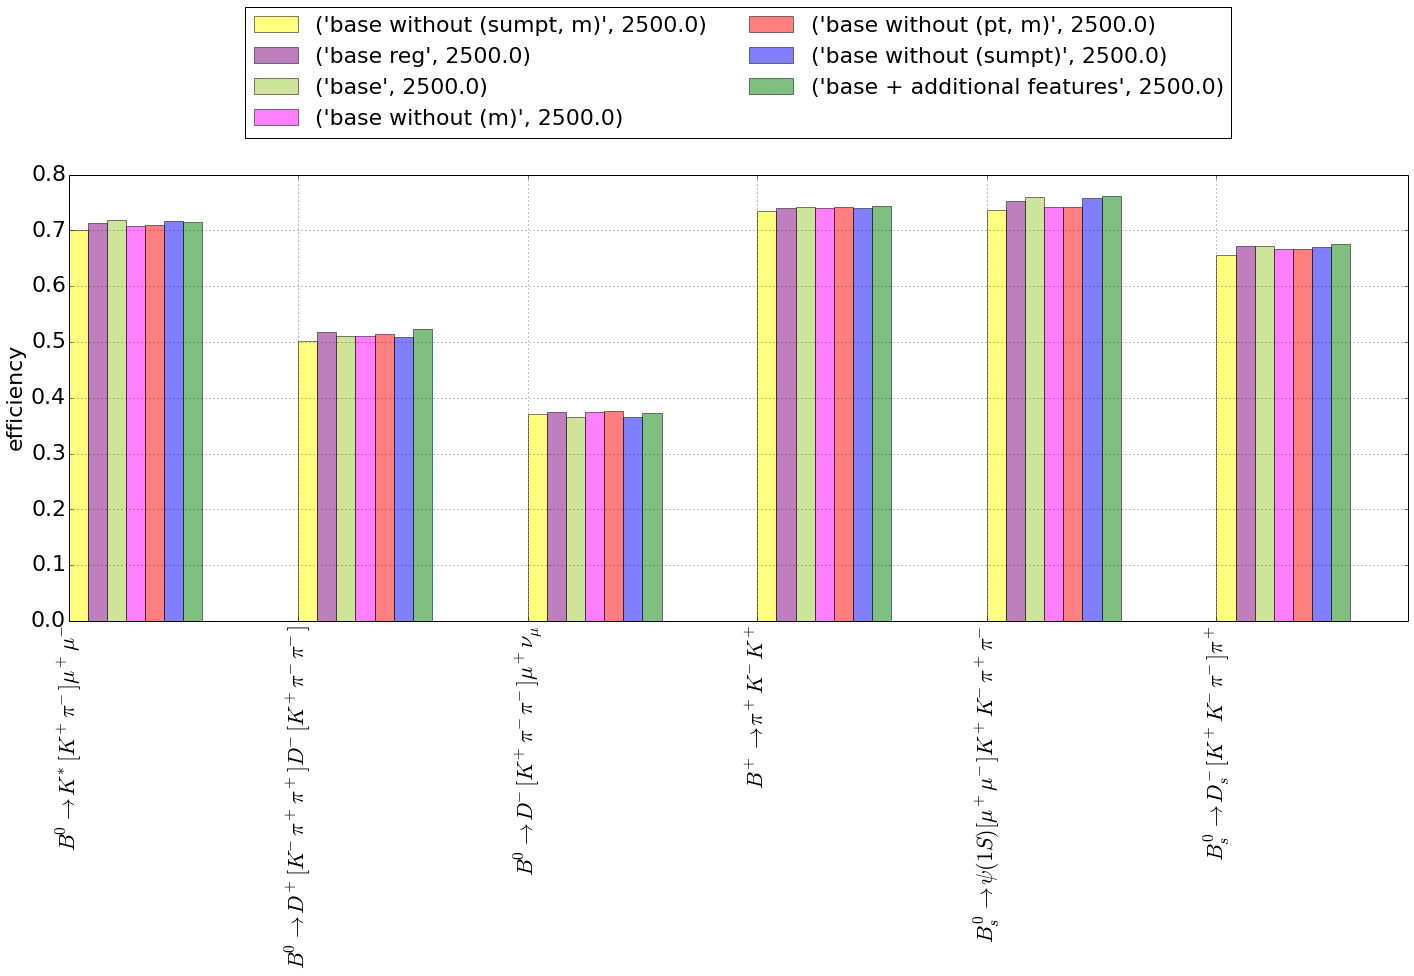

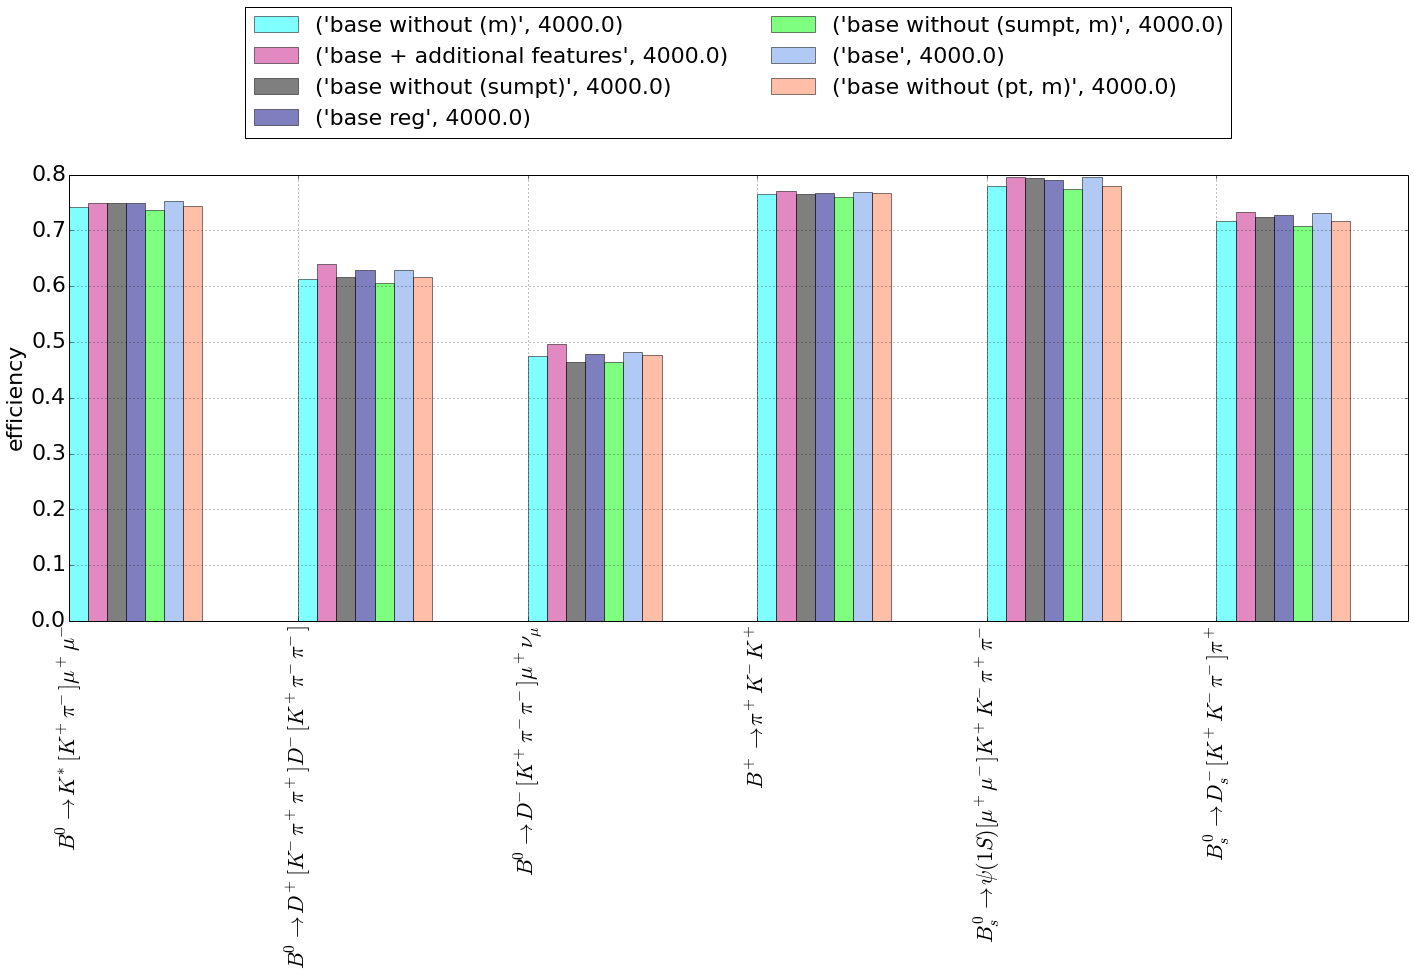

In [77]:
from rep.plotting import BarComparePlot
for r in RATE:
    new_dict = [] 
    for key, val in train_modes_eff.iteritems():
        if r == key[1]:
            new_dict.append((key, val))
    new_dict = dict(new_dict)        
    BarComparePlot(new_dict).plot(new_plot=True, figsize=(24, 8), ylabel='efficiency', fontsize=22)
    lgd = legend(bbox_to_anchor=(0.5, 1.4), loc='upper center', ncol=2, fontsize=22)
# plt.savefig('hlt2.pdf' , format='pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

In [78]:
plots = OrderedDict()
for key, value in estimators.items():
    plots[key] = plot_roc_events(value, test[test['signal'] == 1], test[test['signal'] == 0], key)

base AUC: 0.958564700873
base reg AUC: 0.957389178789
base + additional features AUC: 0.959527972865
base without (pt, m) AUC: 0.955959310671
base without (m) AUC: 0.955864634415
base without (sumpt) AUC: 0.957555024603
base without (sumpt, m) AUC: 0.955220974533


In [79]:
def plot_rocs(plots):
    from rep.plotting import FunctionsPlot
    FunctionsPlot(plots).plot(new_plot=True, xlim=(0.02, 0.06), ylim=(0.65, 0.85))
    plot([1. * events_pass['2500.0-base'] / statistic_length(ds_test_bck)['Events']] * 2, 
         [0., 1], 'b--', label='rate: 2.5 kHz')
    plot([1. * events_pass['4000.0-base'] / statistic_length(ds_test_bck)['Events']] * 2, 
         [0., 1], 'g--', label='rate: 4. kHz')
    lgd = legend(loc='upper center', fontsize=16, bbox_to_anchor=(0.5, 1.4), ncol=3)
    xlabel('FRP, background events efficiency', fontsize=20)
    ylabel('TPR, signal events efficiency', fontsize=20)

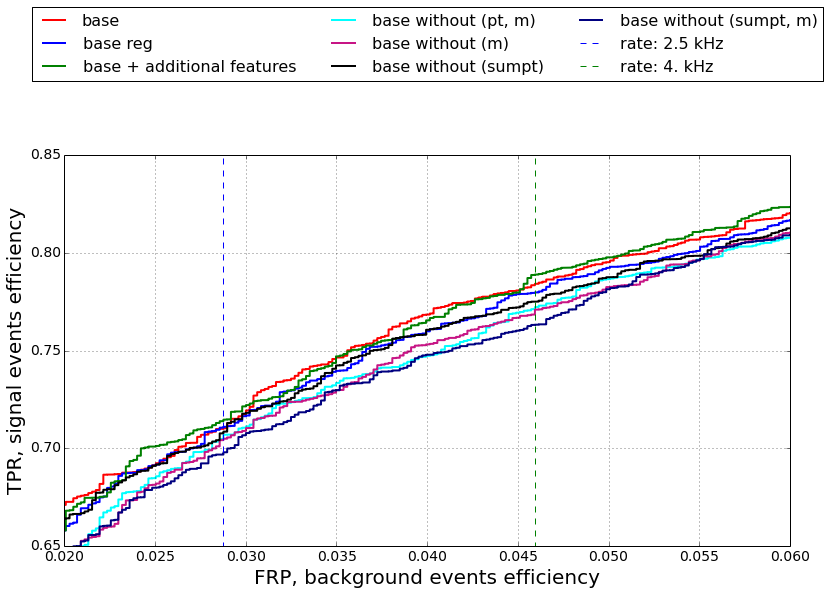

In [80]:
plot_rocs(plots)

### efficiencies for each mode per iterations

#### Generate eff metrics

In [ ]:
mode_metrics = dict()
for mode in sig_train_modes_names:
    mode_metrics[mode] = dict()
    for rate in [2500.]:
        mode_metrics[mode][rate] = generate_topo_metric(ds_test_bck, ds_test_signal[ds_test_signal['mode'] == mode], 
                                                        total_test_bck_events, total_test_signal_events[mode], rate)

In [ ]:
def generate_select_mode(mode):
    def select_mode(pd):
        result = numpy.zeros(len(pd), dtype=bool)
        result[numpy.array(pd['mode']) == mode] = True
        result[numpy.array(pd['signal']) == 0] = True
        return result
    return select_mode

In [ ]:
from rep.report import ClassificationReport
from rep.data import LabeledDataStorage
report = ClassificationReport(estimators, LabeledDataStorage(test, test['signal']))

In [ ]:
staged_eff_plots = []
for mode in sig_train_modes_names:
    select_mode = generate_select_mode(mode)
    staged_eff_plots.append(report.learning_curve(mode_metrics[mode][2500.], mask=select_mode, steps=10, 
                                                  metric_label='mode {}, rate {}, eff'.format(mode, 2500.) ))

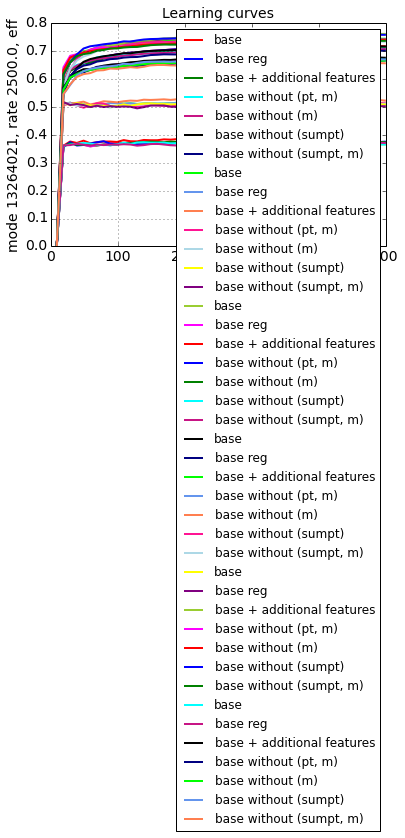

In [81]:
for elem in staged_eff_plots:
    elem.plot()
    show()

# Best model; all channels efficiencies

In [82]:
estimators_bbdt = estimators_border.copy()
estimators_bbdt['base'] = estimators['base without (pt, m)']

In [83]:
thresholds = dict()
RATE = [2500., 4000.]
events_pass = dict()
for name, cl in estimators_bbdt.items():
    prob = cl.predict_proba(ds_test_bck)
    thr, result = calculate_thresholds(ds_test_bck, prob, total_test_bck_events, rates=RATE)
    for rate, val in result.items():
        events_pass['{}-{}'.format(rate, name)] = val[1]
    thresholds[name] = thr
    print name, result

BBDT {4000.0: (0.9948623553274516, 222, 0.00398900328823244), 2500.0: (0.99644124532301714, 139, 0.002497619175965357)}
BBDT chi2 {4000.0: (0.99471695127146487, 222, 0.00398900328823244), 2500.0: (0.99642261356810102, 139, 0.002497619175965357)}
BBDT chi2, eta {4000.0: (0.99482326983877067, 222, 0.00398900328823244), 2500.0: (0.99653381237132344, 139, 0.002497619175965357)}
BBDT 6-bins {4000.0: (0.99402680780929342, 222, 0.00398900328823244), 2500.0: (0.99595672446060457, 139, 0.002497619175965357)}
BBDT modify 6-bins {4000.0: (0.99438273129820987, 222, 0.00398900328823244), 2500.0: (0.99597285602826535, 139, 0.002497619175965357)}
BBDT modify 6-bins strong {4000.0: (0.99420128981760203, 222, 0.00398900328823244), 2500.0: (0.99608596752421563, 139, 0.002497619175965357)}
BBDT modify 6-bins small {4000.0: (0.99412496117804794, 222, 0.00398900328823244), 2500.0: (0.99615391829393951, 139, 0.002497619175965357)}
BBDT by hand {4000.0: (0.99441421391844975, 222, 0.00398900328823244), 2500.0

### trainign channels

In [84]:
train_modes_eff, statistic = result_statistic(estimators_bbdt, sig_train_modes_names, 
                                              test[test['signal'] == 1],
                                              thresholds, RATE, total_test_signal_events)

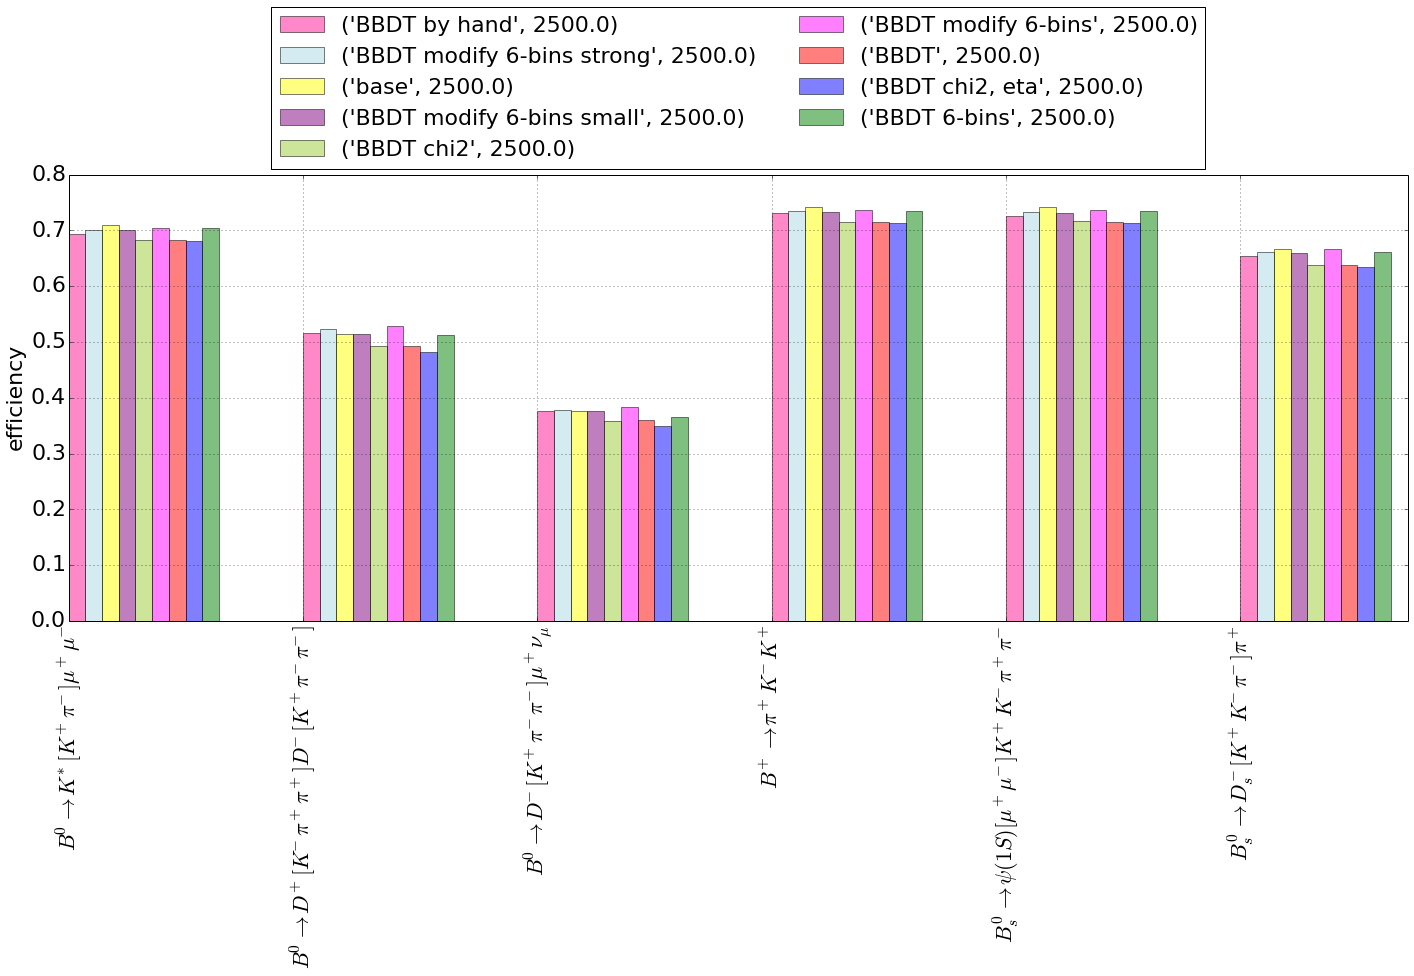

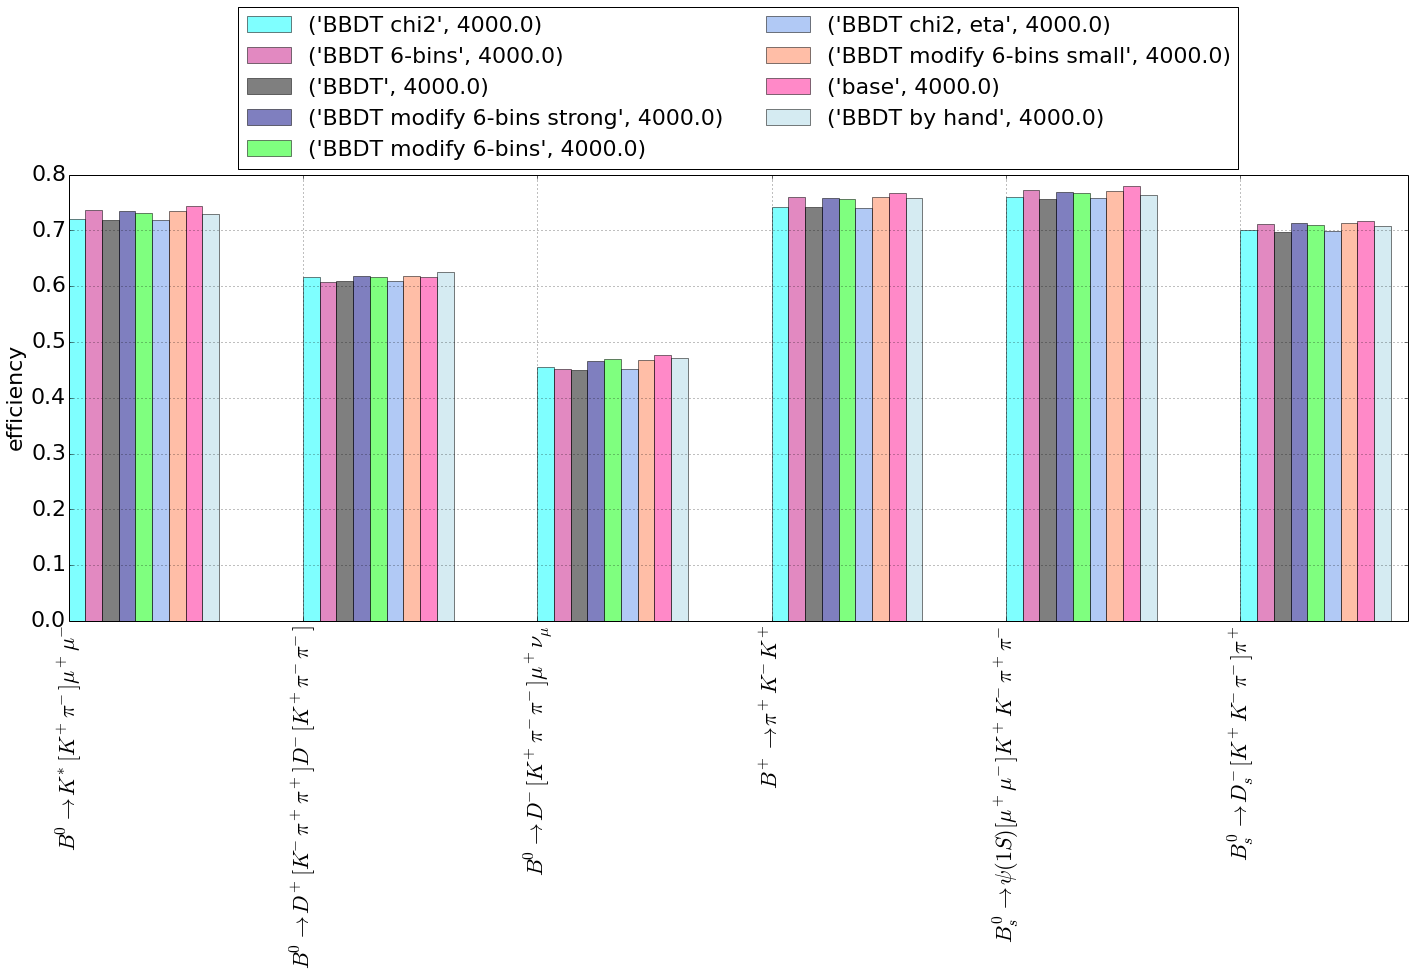

In [85]:
from rep.plotting import BarComparePlot
for r in RATE:
    new_dict = [] 
    for key, val in train_modes_eff.iteritems():
        if r == key[1]:
            new_dict.append((key, val))
    new_dict = dict(new_dict)        
    BarComparePlot(new_dict).plot(new_plot=True, figsize=(24, 8), ylabel='efficiency', fontsize=22)
    lgd = legend(bbox_to_anchor=(0.5, 1.4), loc='upper center', ncol=2, fontsize=22)

BBDT AUC: 0.949483590883
BBDT chi2 AUC: 0.949510455309
BBDT chi2, eta AUC: 0.949325554135
BBDT 6-bins AUC: 0.948787065058
BBDT modify 6-bins AUC: 0.952867875138
BBDT modify 6-bins strong AUC: 0.951526439973
BBDT modify 6-bins small AUC: 0.951137447779
BBDT by hand AUC: 0.952332233169


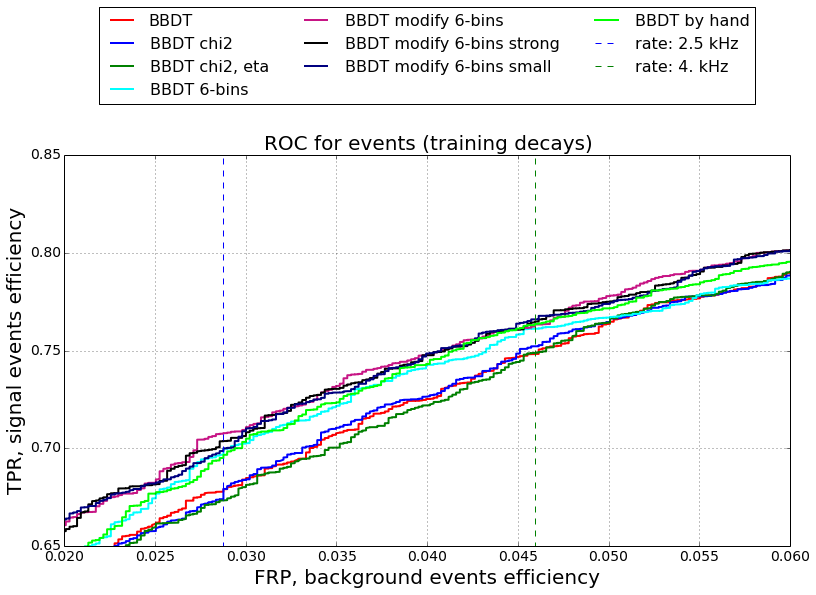

In [86]:
plots = OrderedDict()
for key, value in estimators_border.items():
    plots[key] = plot_roc_events(value, test[test['signal'] == 1], test[test['signal'] == 0], key)
plot_rocs(plots)
title('ROC for events (training decays)', fontsize=20)

### all channels

In [87]:
from collections import defaultdict
all_channels = []
efficiencies = defaultdict(OrderedDict)
for mode in empty_events.keys():
    if mode in set(sig_train_modes_names) or mode == bck_train_mode_name:
        continue
    df = pandas.read_csv(os.path.join(folder , 'mod_{}.csv'.format(mode)), sep='\t')
    if len(df) <= 0:
        continue
    total_events = statistic_length(df)['Events'] + empty_events[mode]
    df = df[(df['pass_nbody'] == 1) & (df['mcor'] <= 10e3)]
    passed_events = statistic_length(df)['Events']
    all_channels.append(df)
    for name, cl in estimators_bbdt.items():
        prob = cl.predict_proba(df)
        for rate, thresh in thresholds[name].items():
            eff = final_eff_for_mode(df, prob, total_events, thresh)
            latex_name = '$' + Samples[str(mode)]['root'].replace("#", "\\") + '$'
            efficiencies[(name, rate)][latex_name] = eff

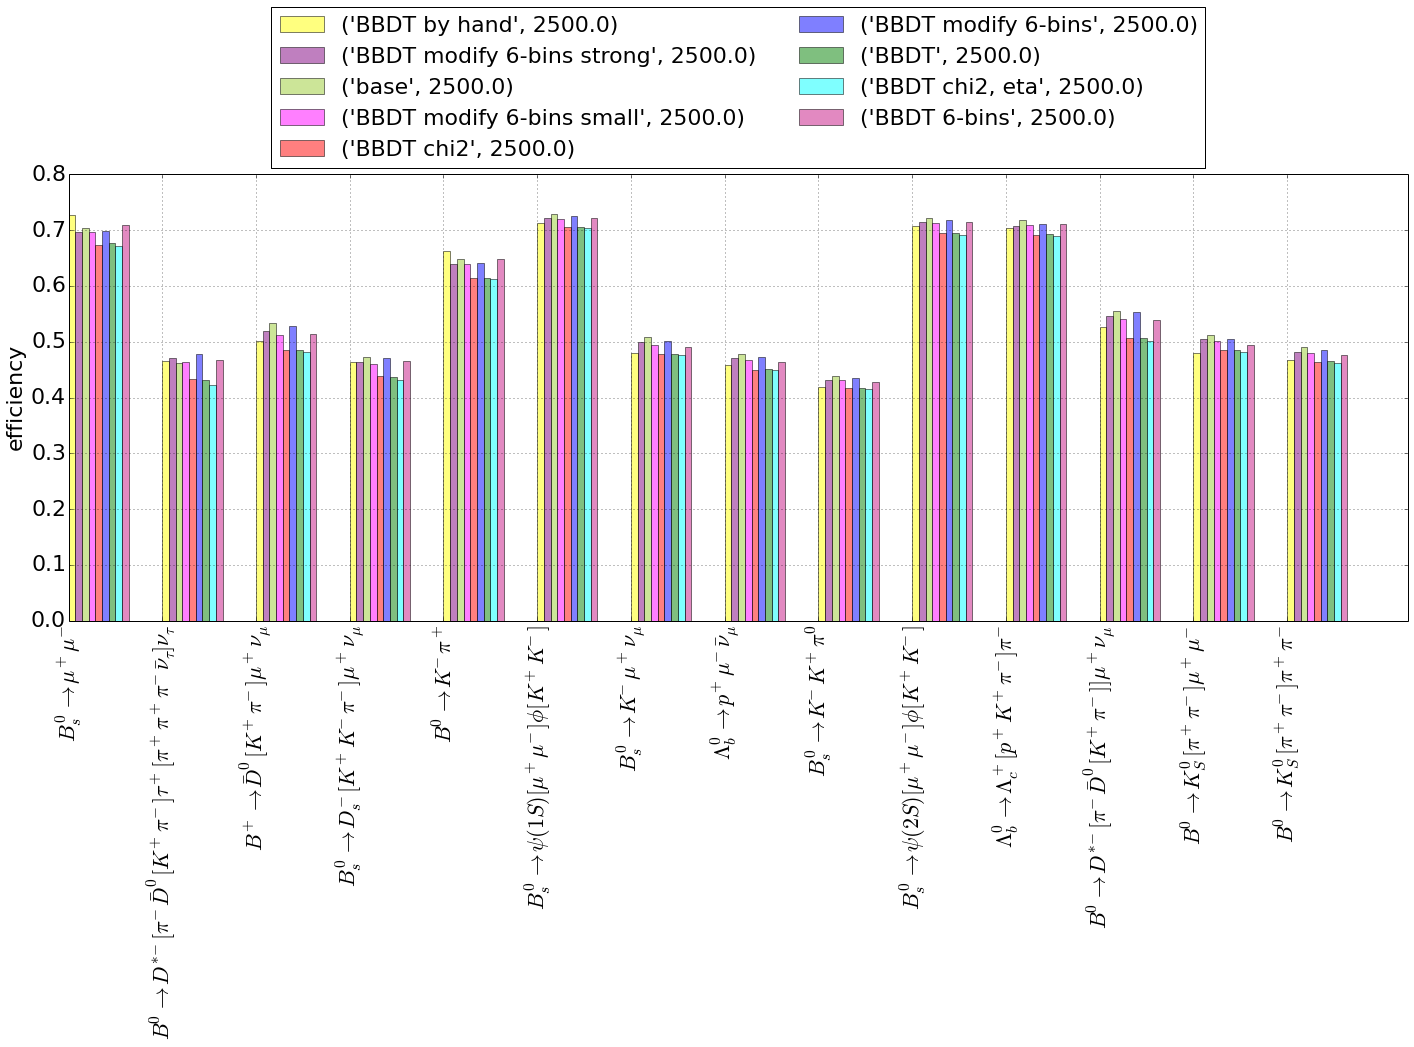

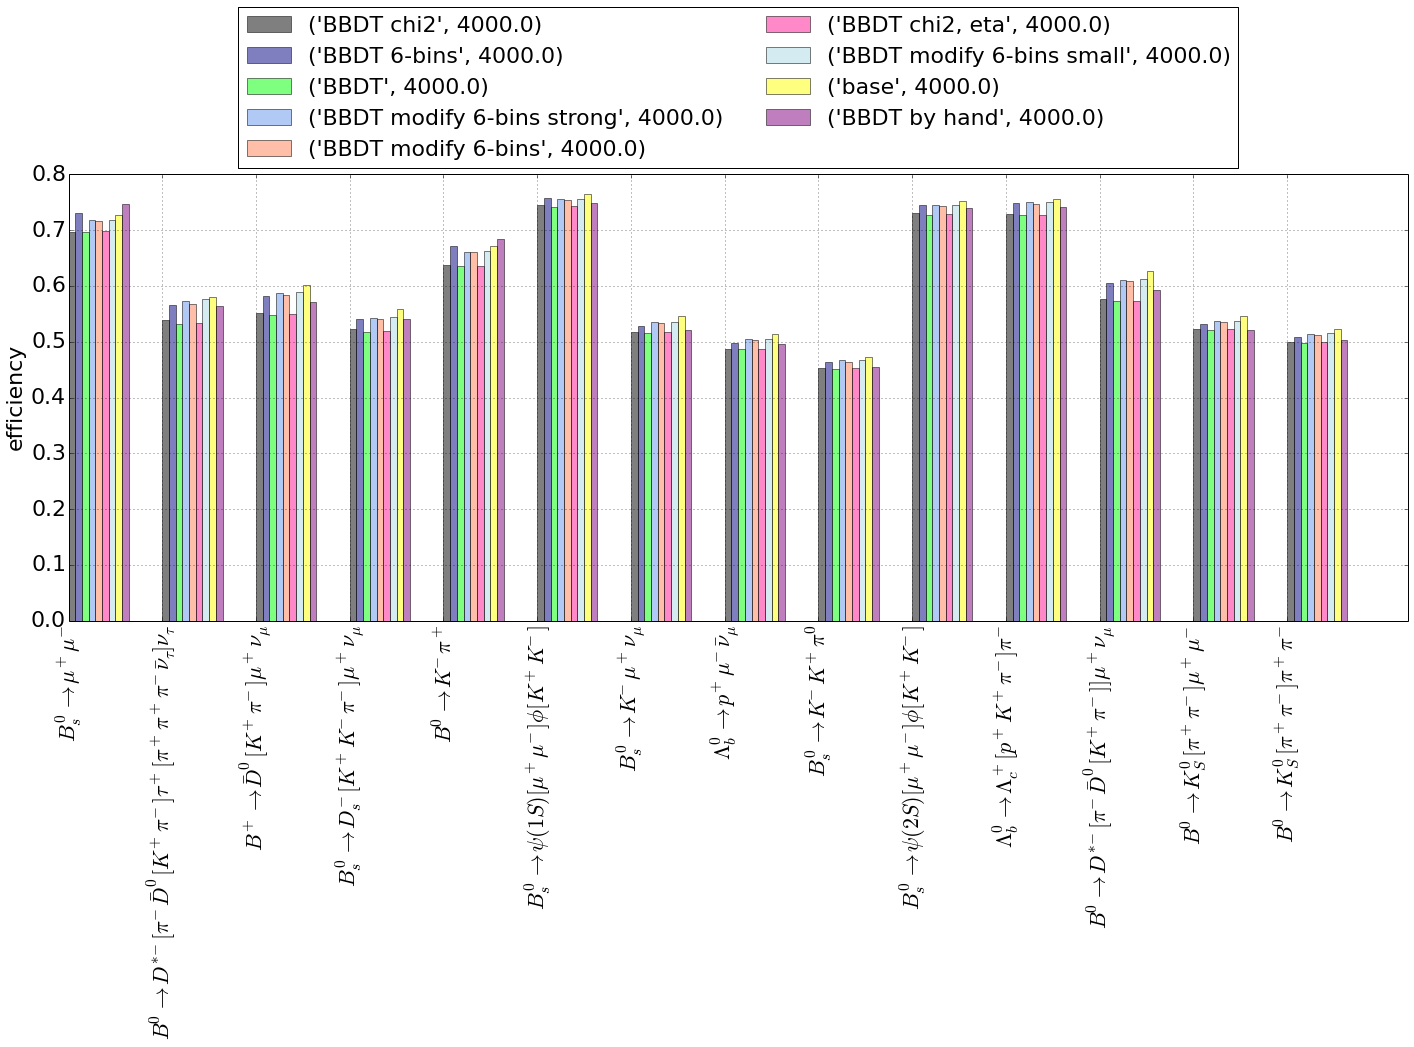

In [88]:
for key, val in efficiencies.items():
    for key_2, val_2 in val.items():
        if val_2 <= 0.1:
            efficiencies[key].pop(key_2)
            
from rep.plotting import BarComparePlot
for r in RATE:
    new_dict = [] 
    for key, val in efficiencies.iteritems():
        if r == key[1]:
            new_dict.append((key, val))
    new_dict = dict(new_dict)        
    BarComparePlot(new_dict).plot(new_plot=True, figsize=(24, 8), ylabel='efficiency', fontsize=22)
    lgd = legend(bbox_to_anchor=(0.5, 1.4), loc='upper center', ncol=2, fontsize=22)

In [89]:
plots_all = OrderedDict()
for key, value in estimators.items():
    plots_all[key] = plot_roc_events(value, pandas.concat([test[test['signal'] == 1]] + all_channels), 
                                     test[test['signal'] == 0], key)

base AUC: 0.89499463248
base reg AUC: 0.895685850847
base + additional features AUC: 0.899267979933
base without (pt, m) AUC: 0.897475380098
base without (m) AUC: 0.897495107093
base without (sumpt) AUC: 0.894163870172
base without (sumpt, m) AUC: 0.89662533543


(0.5, 0.65)

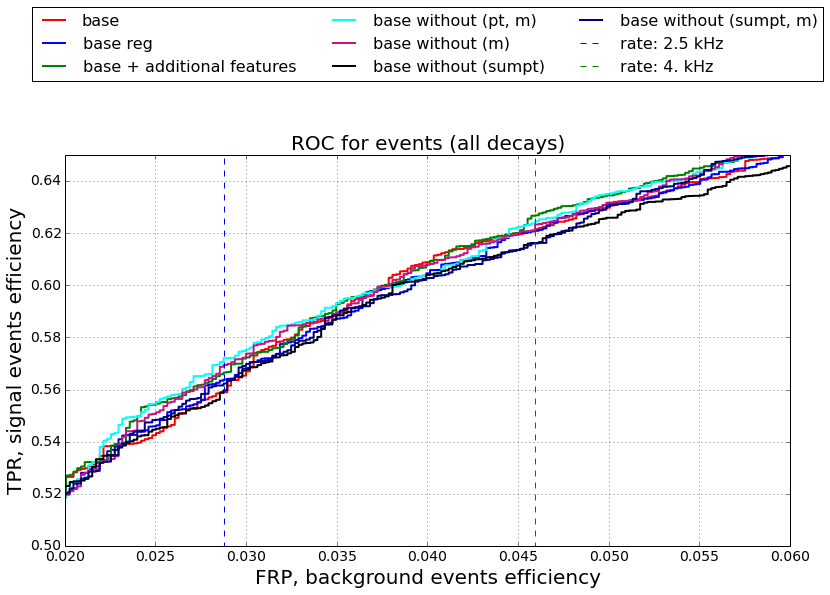

In [90]:
plot_rocs(plots_all)
title('ROC for events (all decays)', fontsize=20)
ylim(0.5, 0.65)

In [91]:
plots_all = OrderedDict()
for key, value in estimators_bbdt.items():
    plots_all[key] = plot_roc_events(value, pandas.concat([test[test['signal'] == 1]] + all_channels), 
                                     test[test['signal'] == 0], key)

BBDT AUC: 0.892968227623
BBDT chi2 AUC: 0.892993049853
BBDT chi2, eta AUC: 0.892547680488
BBDT 6-bins AUC: 0.893047340693
BBDT modify 6-bins AUC: 0.896150179901
BBDT modify 6-bins strong AUC: 0.896187352552
BBDT modify 6-bins small AUC: 0.895816788159
BBDT by hand AUC: 0.896260843657
base AUC: 0.897475380098


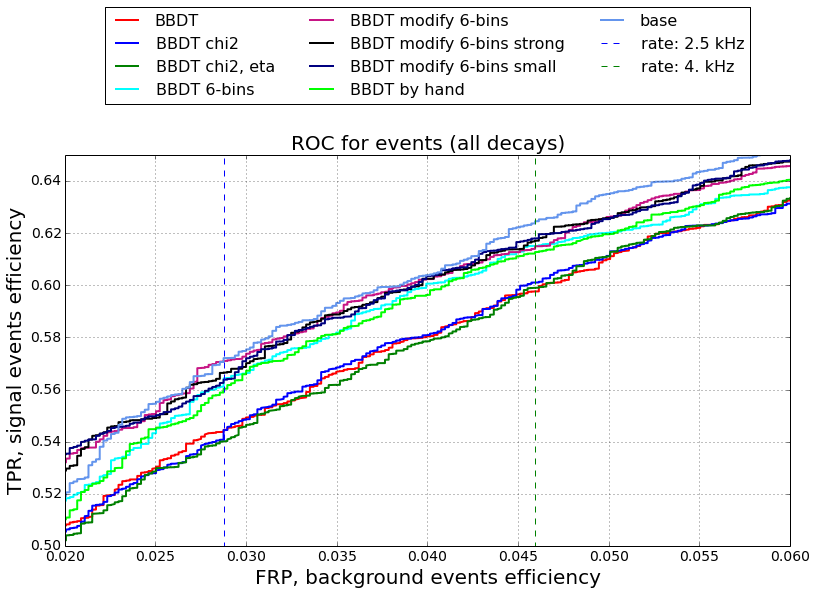

In [92]:
plot_rocs(plots_all)
ylim(0.5, 0.65)
title('ROC for events (all decays)', fontsize=20)

### Experiments with x

In [ ]:
params = {'user_name': 'antares', 'connection':'skygrid',
          'iterations': 5000, 'sync': False, 
          'train_features': variables + ['sumpt']}
estimators_x = ClassifiersFactory()
for x in range(4, 8):
    estimators_x['BBDT-{}'.format(x)] = MatrixNetSkyGridClassifier(intervals=x, **params)

estimators_x.fit(train, train['signal'])

In [ ]:
estimators_x['base'] = estimators['base without (pt, m)']

In [93]:
thresholds_x = dict()
for name, cl in estimators_x.items():
    prob = cl.predict_proba(ds_test_bck)
    thr, result = calculate_thresholds(ds_test_bck, prob, total_test_bck_events, rates=[2500.])
    thresholds_x[name] = thr
    print name, result

BBDT-4 {2500.0: (0.99626207324863569, 139, 0.002497619175965357)}
BBDT-5 {2500.0: (0.99628784046073426, 139, 0.002497619175965357)}
BBDT-6 {2500.0: (0.99595672446060457, 139, 0.002497619175965357)}
BBDT-7 {2500.0: (0.99589233387417819, 139, 0.002497619175965357)}
base {2500.0: (0.99610789680421596, 139, 0.002497619175965357)}


In [94]:
train_modes_eff_x, _ = result_statistic(estimators_x, sig_train_modes_names, 
                                        test[test['signal'] == 1],
                                        thresholds_x, [2500.], total_test_signal_events)

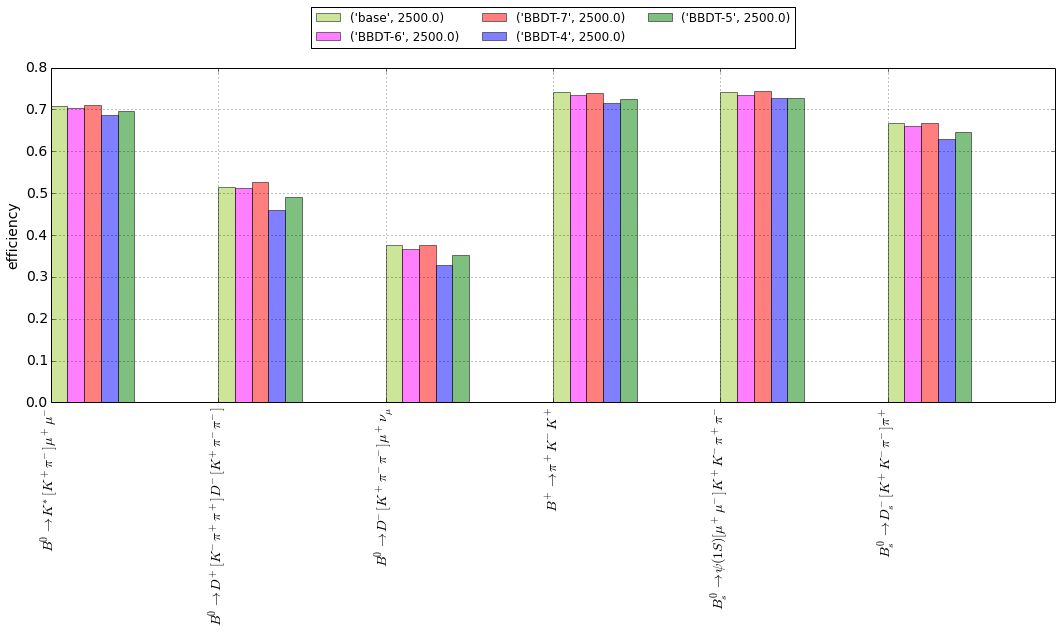

In [95]:
from rep.plotting import BarComparePlot
BarComparePlot(train_modes_eff_x).plot(new_plot=True, figsize=(18, 6), ylabel='efficiency')
legend(bbox_to_anchor=(0.5, 1.2), loc='upper center', ncol=3)

## reg + iter experiments

In [ ]:
params = {'user_name': 'antares', 'connection':'skygrid',
          'sync': False, 
          'train_features': variables + ['sumpt']}
estimators_w_i = ClassifiersFactory()
for w, i in [(0.01, 5000), (0.05, 1000), (0.1, 500)]:
    estimators_w_i['BBDT-{}-{}'.format(w, i)] = MatrixNetSkyGridClassifier(iterations=i, regularization=w, **params)

estimators_w_i.fit(train, train['signal'])

In [96]:
thresholds_w_i = dict()
for name, cl in estimators_w_i.items():
    prob = cl.predict_proba(ds_test_bck)
    thr, result = calculate_thresholds(ds_test_bck, prob, total_test_bck_events, rates=[2500.])
    thresholds_w_i[name] = thr
    print name, result

BBDT-0.01-5000 {2500.0: (0.99610789680421596, 139, 0.002497619175965357)}
BBDT-0.05-1000 {2500.0: (0.99628077194020204, 139, 0.002497619175965357)}
BBDT-0.1-500 {2500.0: (0.99613470573056284, 139, 0.002497619175965357)}


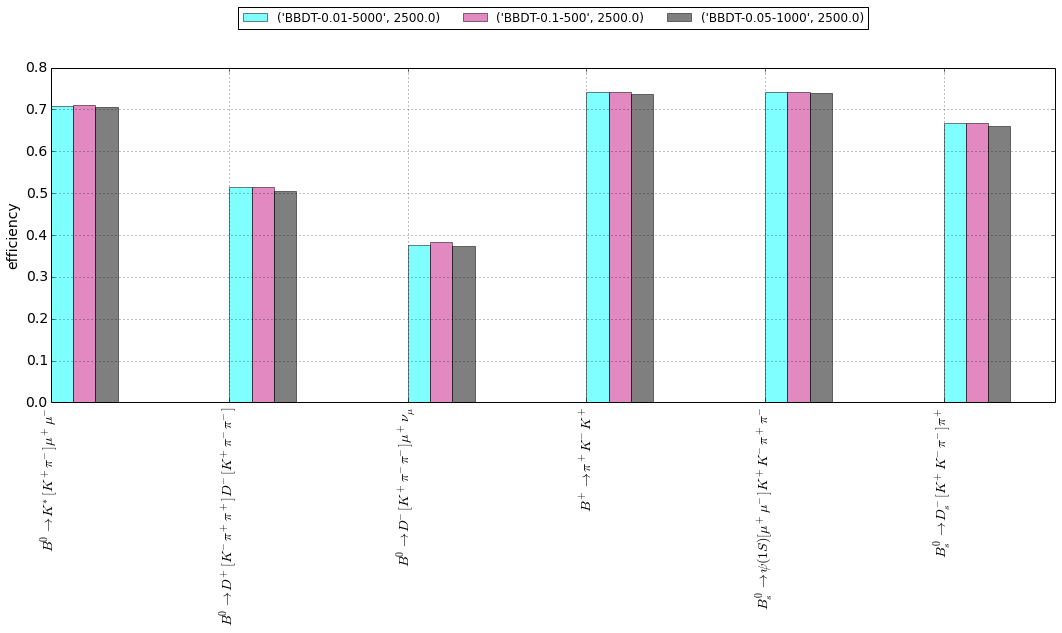

In [97]:
train_modes_eff_w_i, _ = result_statistic(estimators_w_i, sig_train_modes_names, 
                                        test[test['signal'] == 1],
                                        thresholds_w_i, [2500.], total_test_signal_events)
from rep.plotting import BarComparePlot
BarComparePlot(train_modes_eff_w_i).plot(new_plot=True, figsize=(18, 6), ylabel='efficiency')
legend(bbox_to_anchor=(0.5, 1.2), loc='upper center', ncol=3)

In [98]:
plots_all = OrderedDict()
for key, value in estimators_w_i.items():
    plots_all[key] = plot_roc_events(value, pandas.concat([test[test['signal'] == 1]] + all_channels), 
                                     test[test['signal'] == 0], key)

BBDT-0.01-5000 AUC: 0.897475380098
BBDT-0.05-1000 AUC: 0.897212857614
BBDT-0.1-500 AUC: 0.8974984257


(0.5, 0.65)

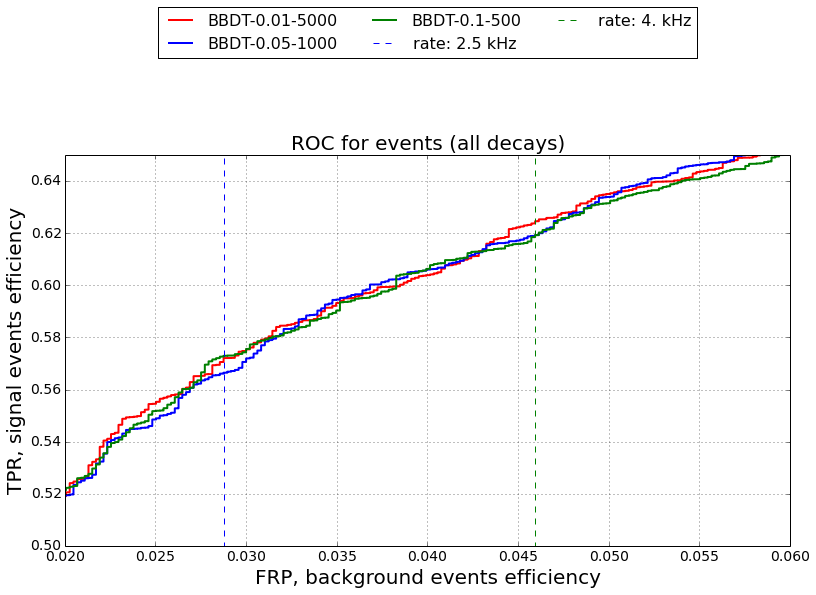

In [99]:
plot_rocs(plots_all)
title('ROC for events (all decays)', fontsize=20)
ylim(0.5, 0.65)

#BEST borders save

In [ ]:
with open("bbdt_run2/hlt2_modify.mx", "w") as f:
    f.write(estimators_border['BBDT modify 6-bins'].formula_mx)

with open("bbdt_run2/hlt2_fix6.mx", "w") as f:
    f.write(estimators_border['BBDT modify 6-bins small'].formula_mx)

with open("bbdt_run2/hlt2_border_base.mx", "w") as f:
    f.write(estimators_border['BBDT'].formula_mx)

with open("bbdt_run2/hlt2_fix6-strong.mx", "w") as f:
    f.write(estimators_border['BBDT modify 6-bins strong'].formula_mx)
    
with open("bbdt_run2/hlt2_by_hand.mx", "w") as f:
    f.write(estimators_border['BBDT by hand'].formula_mx)

In [ ]:
result_thresholds = {'hlt2_modify.mx': thresholds['BBDT modify 6-bins'][2500.],
                    'hlt2_fix6.mx': thresholds['BBDT modify 6-bins small'][2500.],
                    'hlt2_border_base.mx': thresholds['BBDT'][2500.],
                    'hlt2_fix6-strong.mx': thresholds['BBDT modify 6-bins strong'][2500.],
                    'hlt2_by_hand.mx': thresholds['BBDT by hand'][2500.]}

In [ ]:
with open('models/bbdt_thresholds.pkl', 'w') as f:
    cPickle.dump(result_thresholds, f)